In [2]:
import pyemma

In [3]:
import numpy as np

In [4]:
import glob

In [5]:
dtrajs = [np.load(x) for x in glob.glob('dtrajs/*.npy')]

In [34]:
dtrajs = [np.load(x) for x in glob.glob('dtrajs/*.npy')]
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

In [13]:
msm.nstates

21

In [14]:
msm.nstates_full

98

In [16]:
msm.active_state_fraction

0.21428571428571427

In [17]:
msm.active_count_fraction

1.0

In [18]:
its = pyemma.msm.timescales_msm(dtrajs)

26-09-17 22:46:24 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[0] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


In [5]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

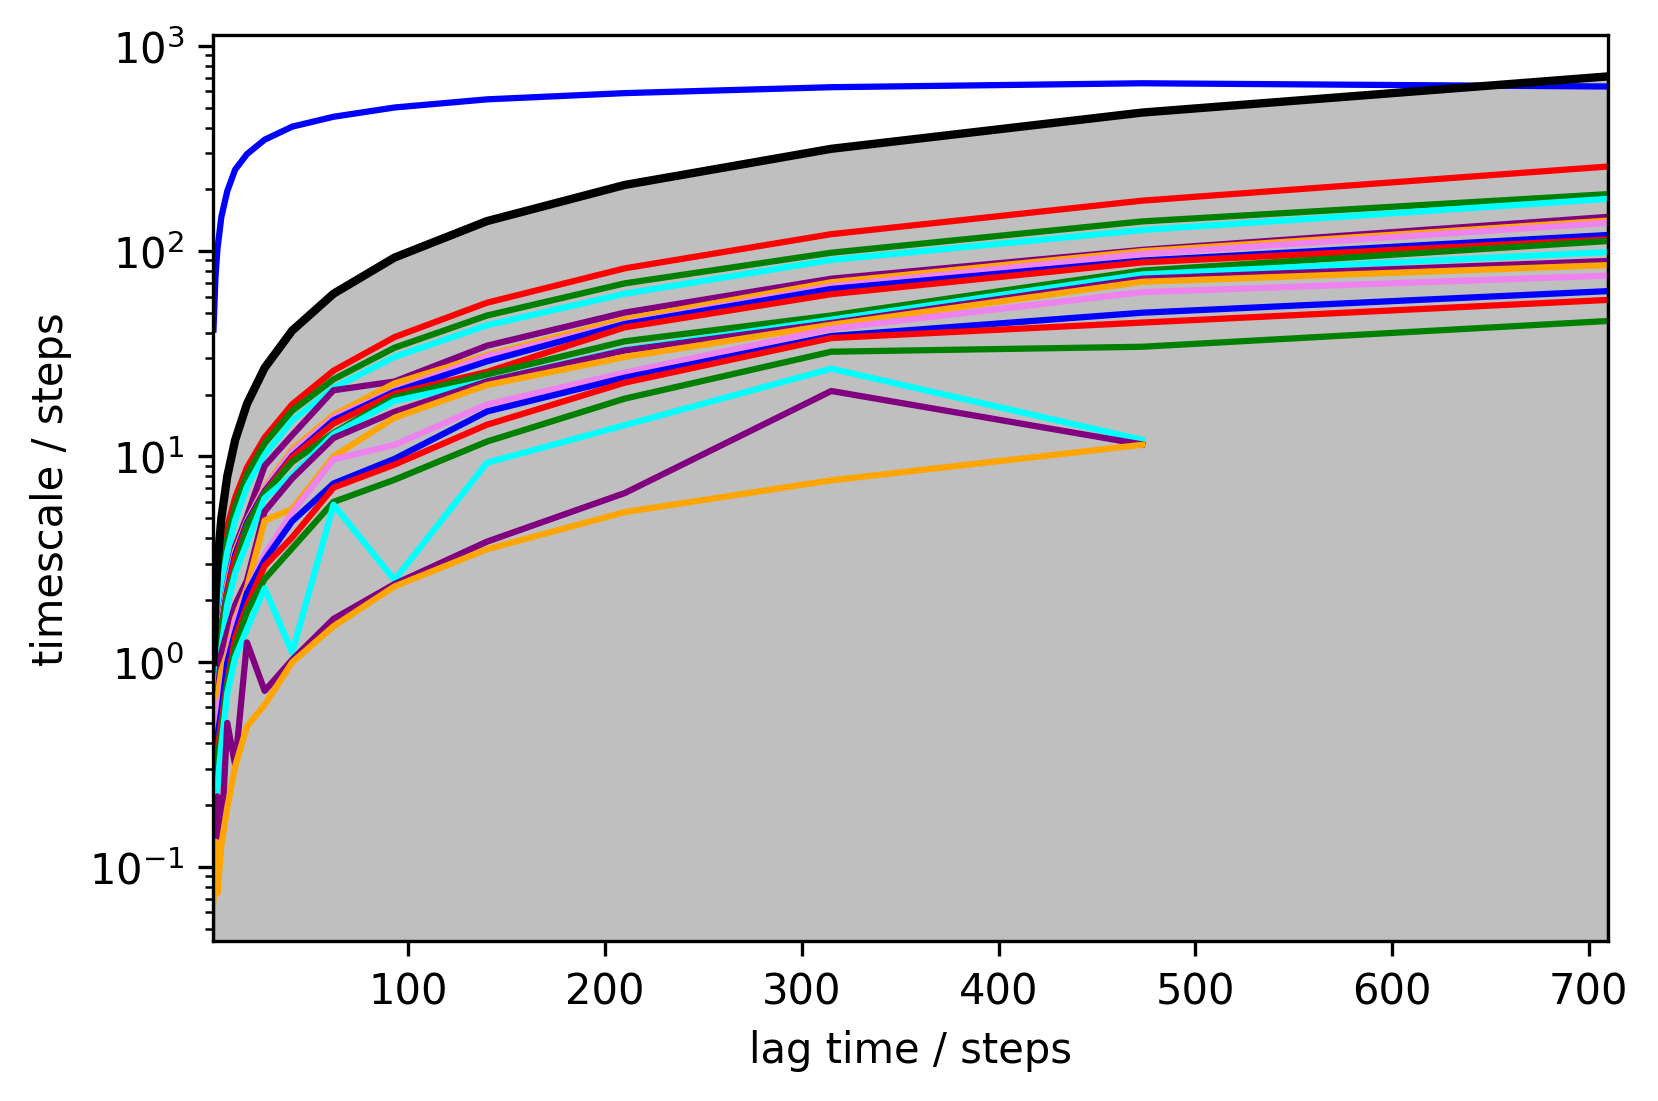

In [20]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its)

In [21]:
msm.stationary_distribution

array([  1.52924208e-04,   4.34423253e-02,   2.28457831e-03,
         8.91218830e-02,   1.07519942e-06,   2.08943526e-04,
         7.51881504e-06,   4.08241998e-03,   5.38991195e-07,
         3.34887615e-04,   3.23087575e-06,   1.07519942e-06,
         1.07641870e-05,   7.05309015e-03,   5.29696290e-07,
         6.81910761e-03,   4.46827081e-05,   6.84380487e-04,
         1.66537756e-03,   8.42911621e-01,   1.16904534e-03])

In [6]:
import msmbuilder
import msmbuilder.msm

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
msm = msmbuilder.msm.MarkovStateModel(lag_time=100)

In [26]:
msm.fit(dtrajs)

MSM contains 1 strongly connected component above weight=0.01. Component 0 selected, with population 100.000000%


MarkovStateModel(ergodic_cutoff='on', lag_time=100, n_timescales=None,
         prior_counts=0, reversible_type='mle', sliding_window=True,
         verbose=True)

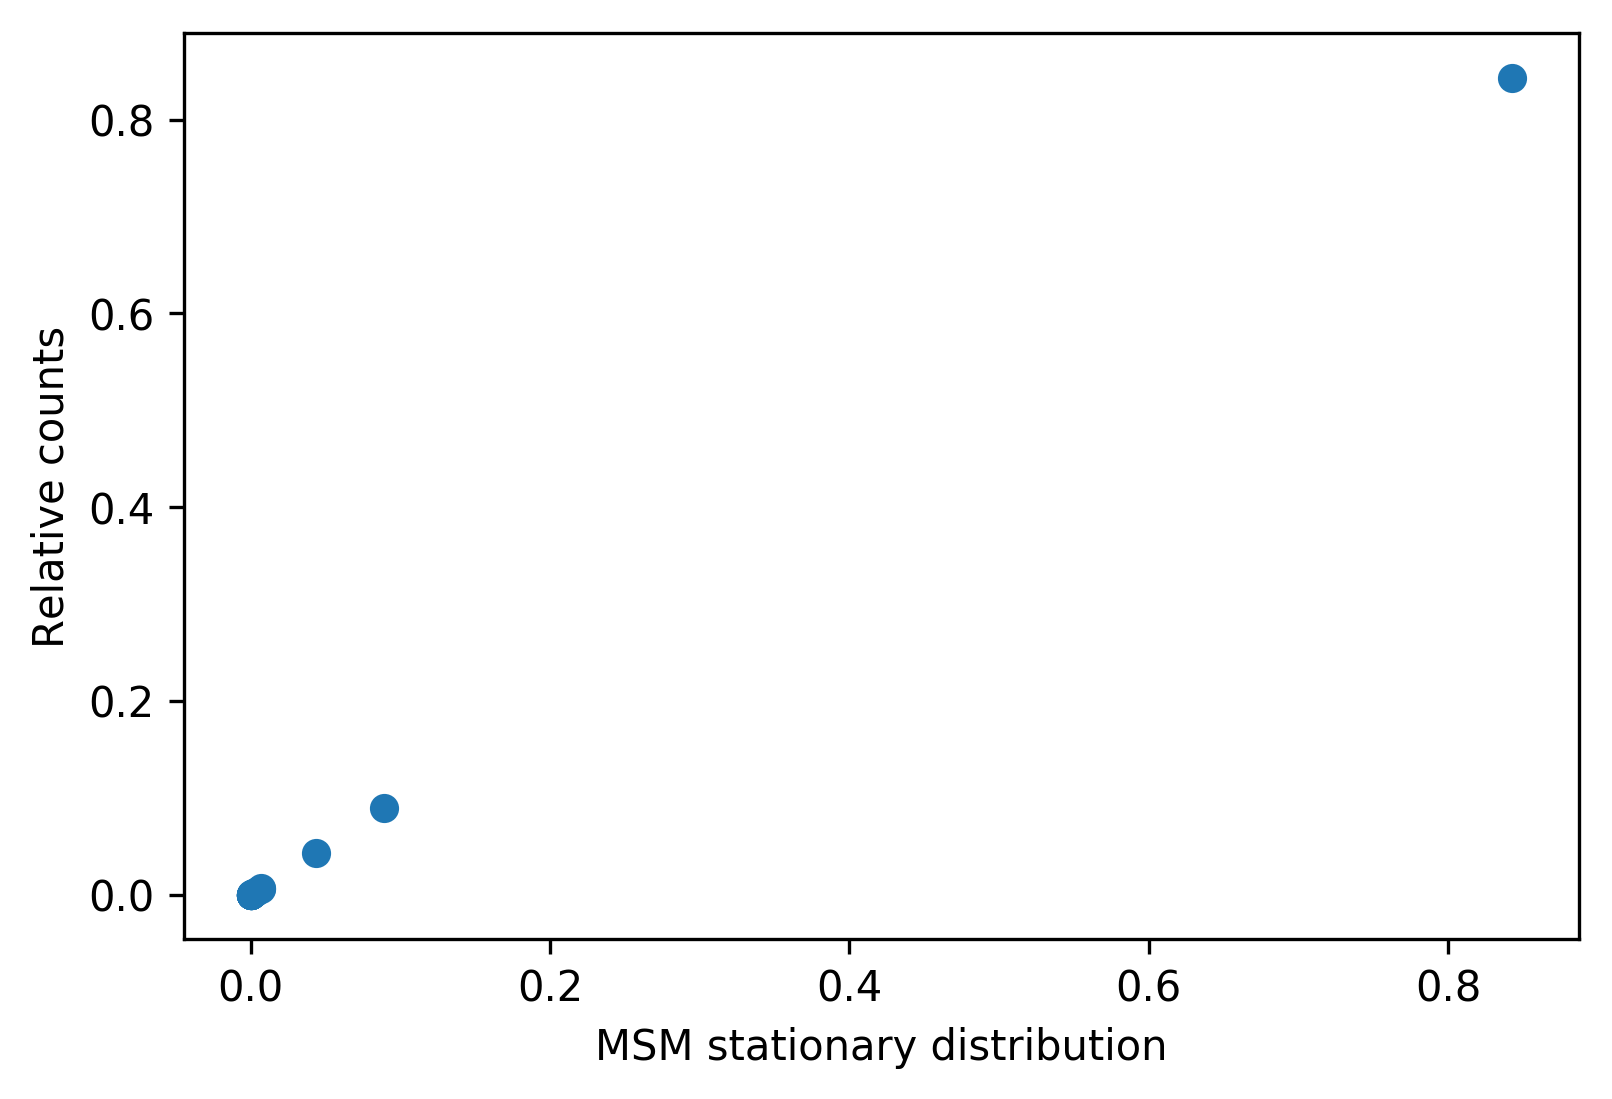

In [28]:
project = 'dih_100'

statdist = msm.populations_
relative_counts = msm.countsmat_.sum(0) / np.sum(msm.countsmat_)

plt.figure(dpi=300)
plt.scatter(statdist, relative_counts)
plt.xlabel('MSM stationary distribution')
plt.ylabel('Relative counts')
#plt.plot(np.arange(0, 0.06, 0.01), np.arange(0, 0.06, 0.01), c='red')
#plt.savefig('sanity_check_%s.png' %project, dpi=300)
plt.show()

In [29]:
msm.mapping_

{18: 0,
 21: 1,
 26: 2,
 27: 3,
 28: 4,
 33: 5,
 34: 6,
 40: 7,
 46: 8,
 47: 9,
 48: 10,
 53: 11,
 56: 12,
 65: 13,
 67: 14,
 72: 15,
 76: 16,
 83: 17,
 95: 18,
 96: 19,
 97: 20}

In [32]:
msm.timescales_

array([ 507.54899187,   40.68689905,   35.73618537,   32.64323621,
         24.21392921,   23.29713299,   23.08025193,   22.47622043,
         21.71305629,   21.27908361,   18.99636974,    2.45542765,
          2.31620271,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan])

In [33]:
msm.

array([  1.52924208e-04,   4.34423253e-02,   2.28457831e-03,
         8.91218830e-02,   1.07519942e-06,   2.08943526e-04,
         7.51881504e-06,   4.08241998e-03,   5.38991195e-07,
         3.34887615e-04,   3.23087575e-06,   1.07519942e-06,
         1.07641870e-05,   7.05309014e-03,   5.29696290e-07,
         6.81910815e-03,   4.46827081e-05,   6.84380486e-04,
         1.66537756e-03,   8.42911621e-01,   1.16904534e-03])

In [ ]:
# so state 96 is the over 80% populated one

In [9]:
from collections import Counter

In [10]:
Counter(np.concatenate(dtrajs))

Counter({18: 307,
         21: 85142,
         26: 4384,
         27: 175645,
         28: 2,
         33: 401,
         34: 15,
         40: 8100,
         46: 1,
         47: 642,
         48: 8,
         53: 2,
         56: 20,
         65: 14244,
         67: 1,
         72: 11530,
         76: 89,
         83: 1297,
         95: 3240,
         96: 1648666,
         97: 2229})

In [ ]:
# before further conclusions - I want to test if the clustering is done right - 

In [24]:
cluster_centers = np.load('cluster_centers/100.npy')

In [15]:
cluster_centers.shape

(100, 467)

In [16]:
traj = np.load('trajs_95/1000.npy')

In [21]:
import scipy
import scipy.cluster

In [24]:
dtraj, distances = scipy.cluster.vq.vq(traj, cluster_centers)

In [26]:
np.min(distances)

101.3401

In [30]:
np.min(scipy.spatial.distance.cdist(traj, cluster_centers)[0, :])

110.20611083455518

In [31]:
distances[0]

110.20613

In [32]:
scipy.spatial.distance.cdist(traj, cluster_centers)[0, 96]

110.20611083455518

In [33]:
# so all good here, but this seems pretty far - look at TICA landscapes

In [36]:
# also look at the eigenvector in msm

In [44]:
msm.eigenvectors_right()[:,1]

array([  0.07360043,   0.08577666,   0.09203573,   0.07734382,
         0.0994412 ,   0.10130197,   0.10151116,   0.09758702,
         0.10118343,   0.07477063,   0.10087592,   0.0994412 ,
         0.10157047,   0.09564056,   0.10875958, -12.0683846 ,
         0.10048205,   0.08890269,   0.07286845,   0.08308878,   0.0939872 ])

In [46]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

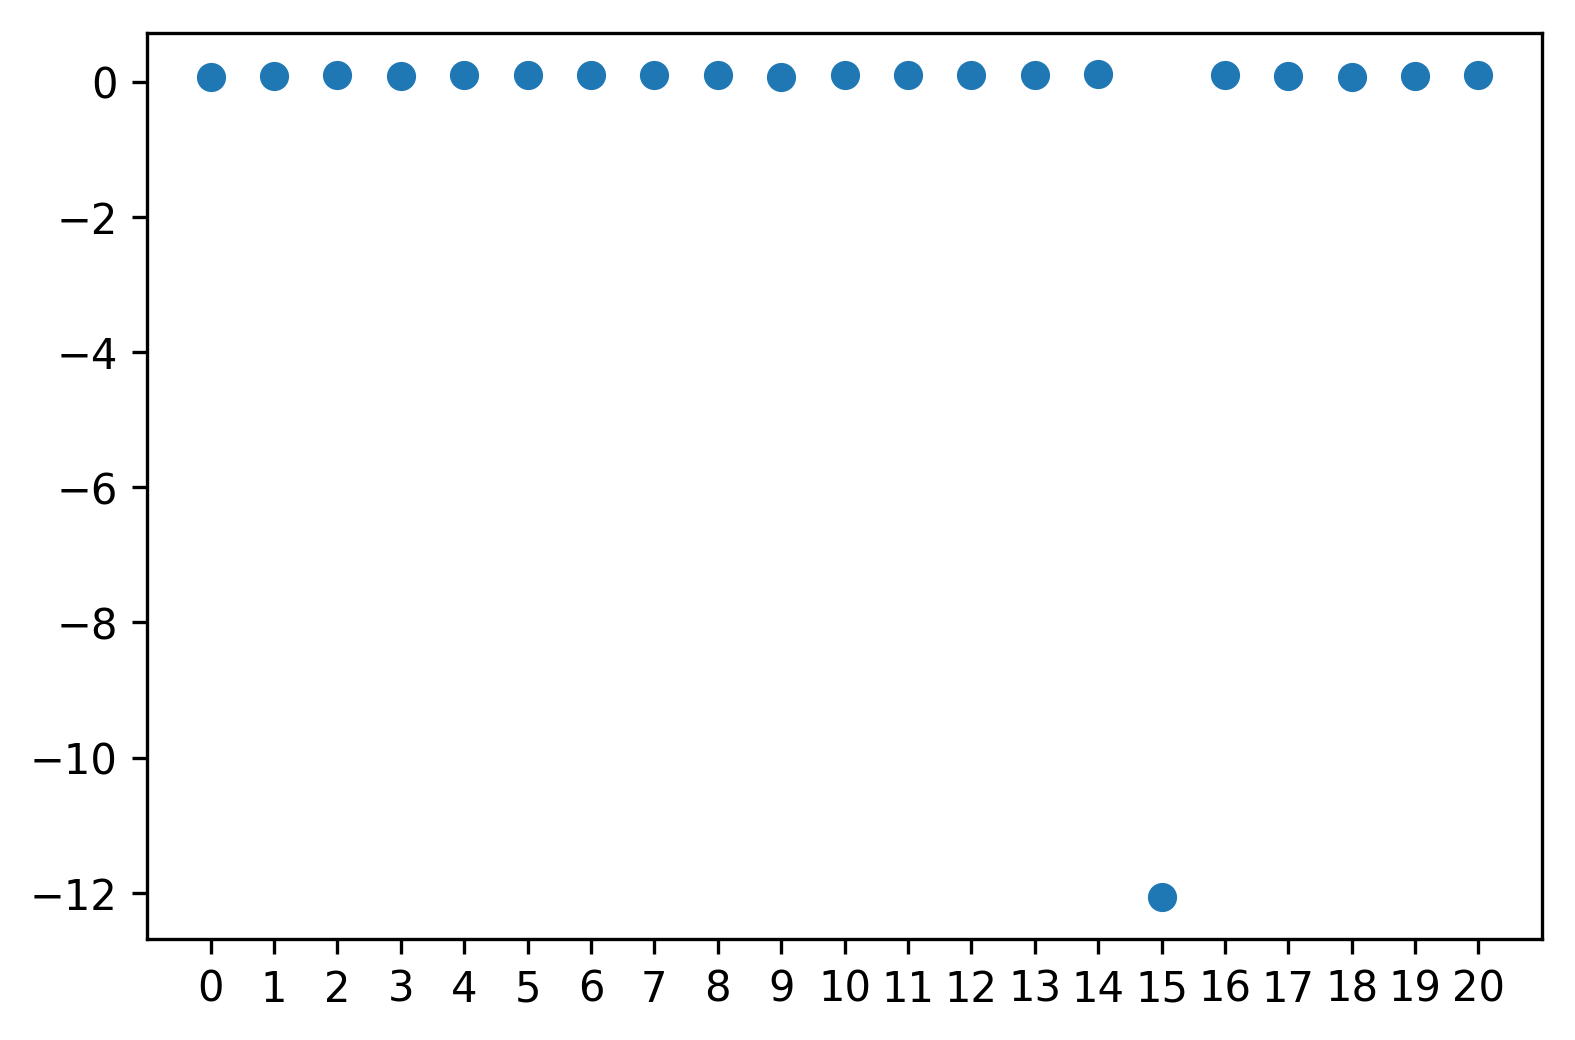

In [51]:
plt.figure(dpi=300)
plt.scatter(range(len(msm.eigenvectors_right()[:,1])), msm.eigenvectors_right()[:,1])
plt.xticks(range(len(msm.eigenvectors_right()[:,1])))
plt.show()

In [53]:
msm.active_set

array([18, 21, 26, 27, 28, 33, 34, 40, 46, 47, 48, 53, 56, 65, 67, 72, 76,
       83, 95, 96, 97])

In [60]:
msm.active_set[15], msm.active_set[19]

(72, 96)

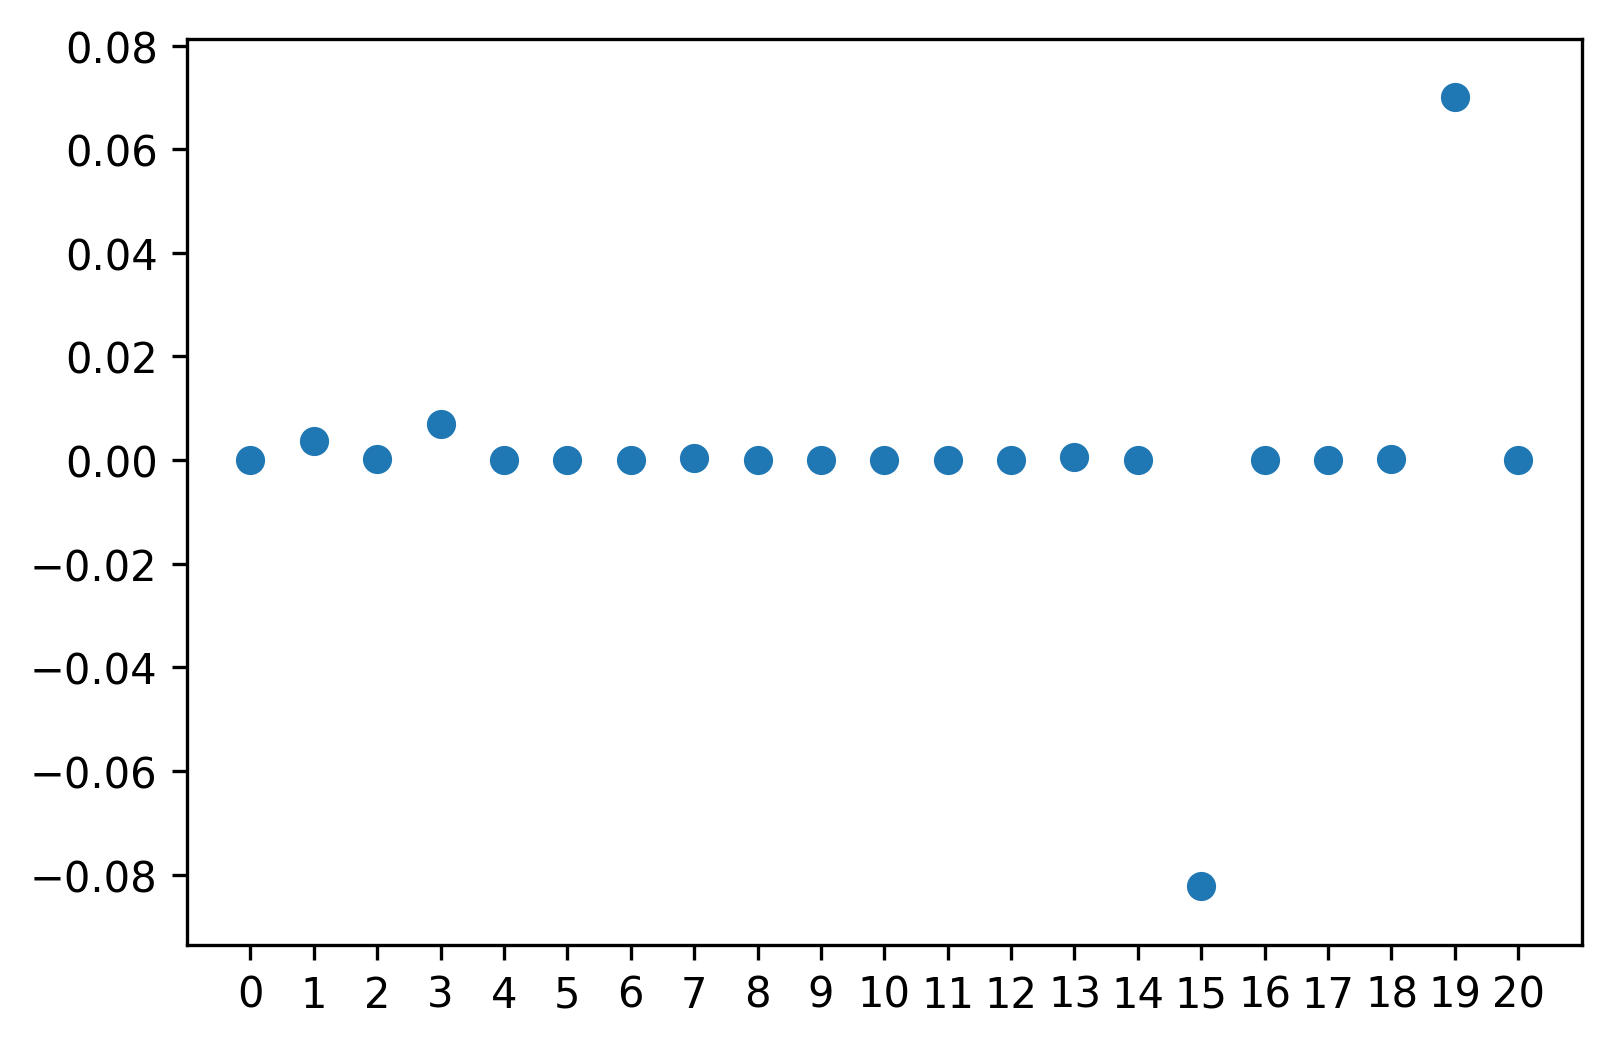

In [59]:
plt.figure(dpi=300)
plt.scatter(range(len(msm.eigenvectors_left()[1,:])), msm.eigenvectors_left()[1,:])
plt.xticks(range(len(msm.eigenvectors_left()[1,:])))
plt.show()

In [61]:
# let's look at TICs

In [7]:
tica_trajs = glob.glob('trajs_10/*.npy')

In [8]:
tica_proj = []

for traj in tica_trajs:
    tica_proj.append(np.load(traj))
    
tica_proj_concat = np.concatenate(tica_proj)    

In [10]:
import msmexplorer

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


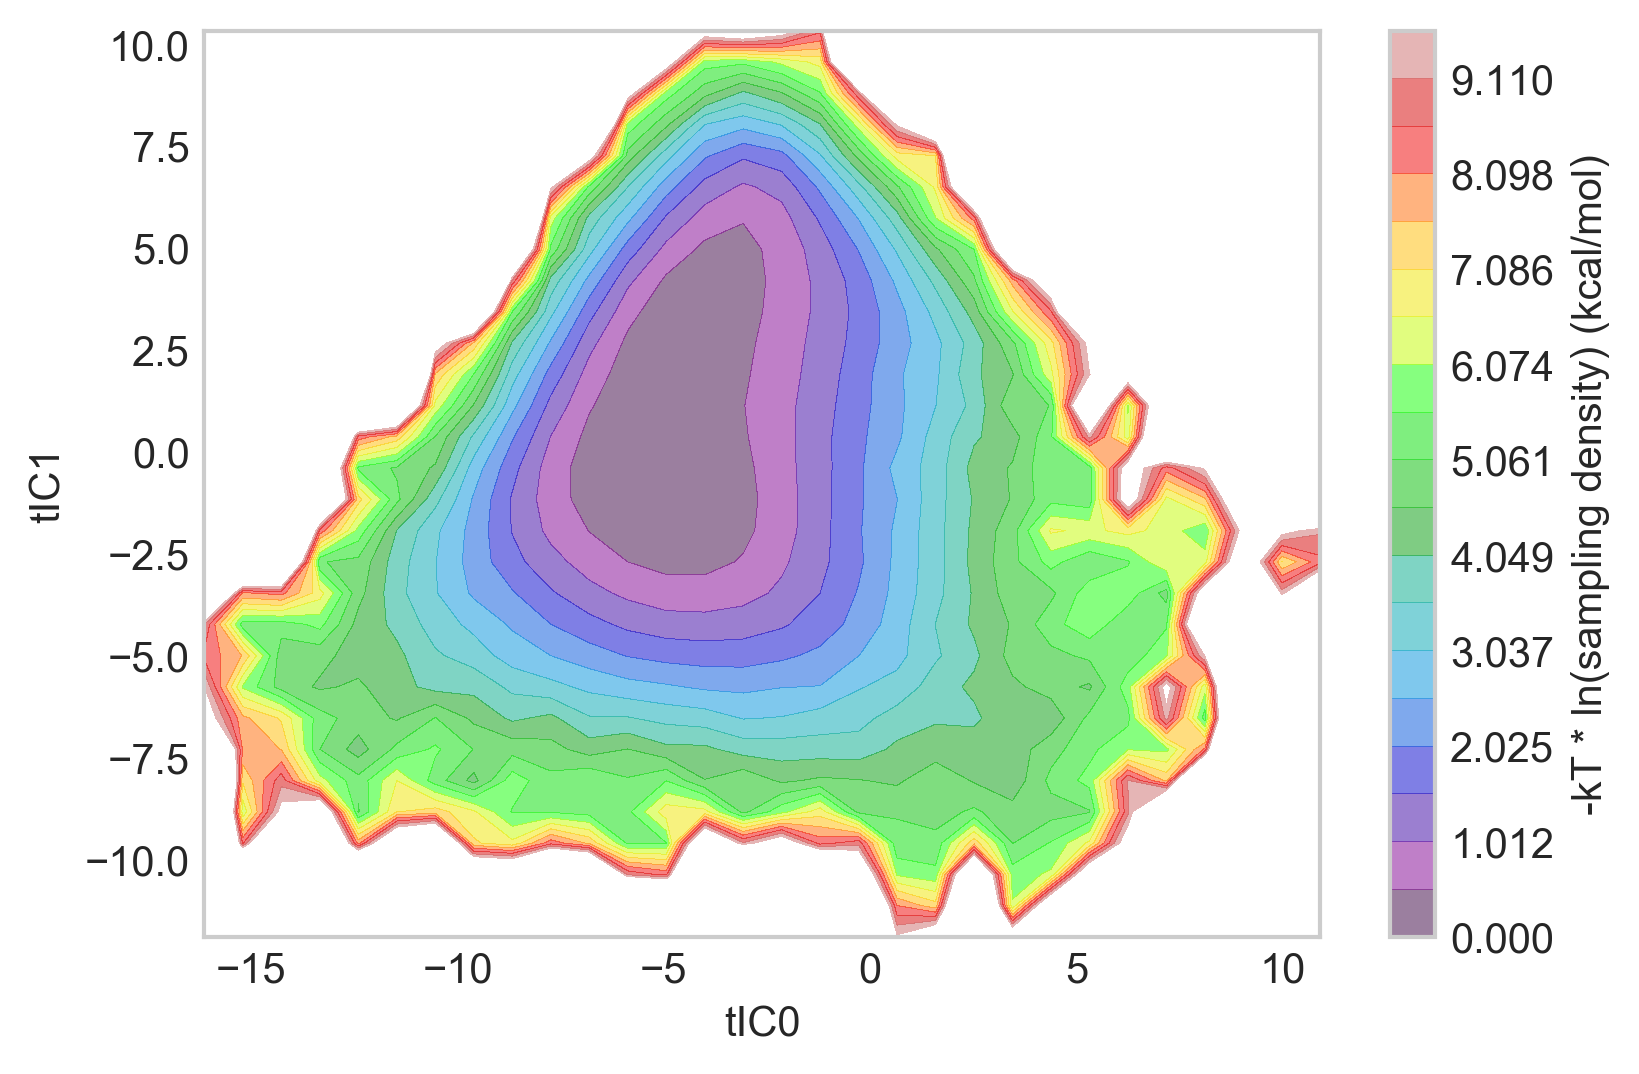

In [11]:
i=0
j=1

plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True, n_samples=1000000)
plt.close()

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC0')
ax.set_ylabel('tIC1')
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('-kT * ln(sampling density) (kcal/mol)')

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
plt.show()

In [13]:
# we wanna plot on the same axis limits as Apo data - so load apo data

In [14]:
tica_trajs_apo = glob.glob('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/tica/10_tics_trajs/*.npy')

In [22]:
tica_proj_apo = []

for traj in tica_trajs_apo:
    tica_proj_apo.append(np.load(traj))
    
tica_proj_concat_apo = np.concatenate(tica_proj_apo)    

In [19]:
import itertools

In [23]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:

    # first we plot all data in the TICS to get xlim and ylim

    plot_data = msmexplorer.plot_free_energy(tica_proj_concat_apo, obs=(i,j), cbar=True, return_data=True, n_samples=100000)
    plt.close()

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC0')
    ax.set_ylabel('tIC1')
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('- kT * ln(sampling density) (kcal/mol)')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
    plt.close()

    # now actual data
    plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True, n_samples=100000)
    plt.close()

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('- kT * ln(sampling density) (kcal/mol)')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    plt.savefig('landscapes/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [16]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih'

In [21]:
# next thing - same landscapes but plot the 21 cluster centers on them too

In [25]:
cluster_centers = np.load('cluster_centers/100.npy')

In [26]:
dtrajs = [np.load(x) for x in glob.glob('dtrajs/*.npy')]
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

In [27]:
msm.active_set

array([18, 21, 26, 27, 28, 33, 34, 40, 46, 47, 48, 53, 56, 65, 67, 72, 76,
       83, 95, 96, 97])

In [32]:
cluster_centers[msm.active_set].shape

(21, 467)

In [36]:
combinations = itertools.combinations(range(10), 2)

for i,j in combinations:

    # first we plot all data in the TICS to get xlim and ylim

    plot_data = msmexplorer.plot_free_energy(tica_proj_concat_apo, obs=(i,j), cbar=True, return_data=True, n_samples=100000)
    plt.close()

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC0')
    ax.set_ylabel('tIC1')
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('- kT * ln(sampling density) (kcal/mol)')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
    plt.close()

    # now actual data
    plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True, n_samples=100000)
    plt.close()

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('- kT * ln(sampling density) (kcal/mol)')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    plt.scatter(cluster_centers[msm.active_set][:,i], cluster_centers[msm.active_set][:,j], c='black', marker='.')

    plt.savefig('landscapes_cluster_centers/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [37]:
# let's see where the starting points for our trajectories here are

In [44]:
tica_proj[0].shape

(1960, 10)

In [45]:
tica_starts = []

for traj in tica_proj:
    tica_starts.append(traj[0])

In [49]:
tica_starts[0]

array([ -2.55477715,  -1.98144639,   3.32300591, -11.4026022 ,
         9.66269779,  -7.82822132, -12.45515442, -16.27258873,
         9.39140987,  -3.00568795], dtype=float32)

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


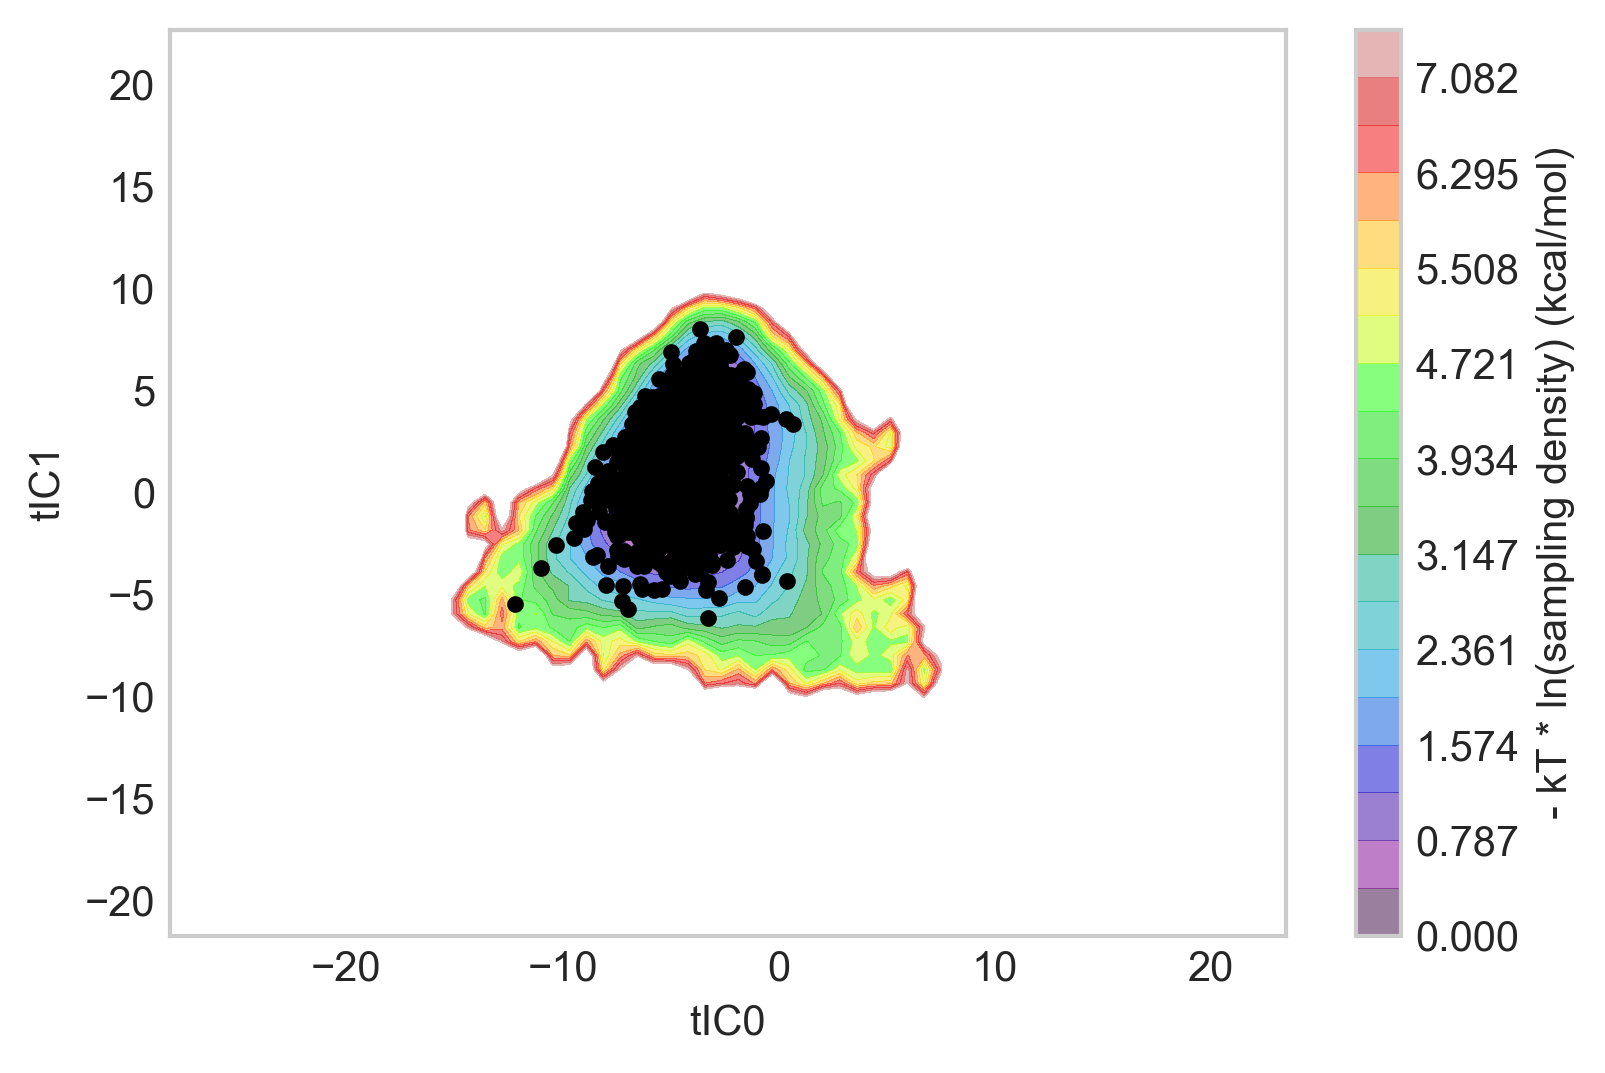

In [53]:
# first we plot all data in the TICS to get xlim and ylim

i,j = 0,1

plot_data = msmexplorer.plot_free_energy(tica_proj_concat_apo, obs=(i,j), cbar=True, return_data=True, n_samples=100000)
plt.close()

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC0')
ax.set_ylabel('tIC1')
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('- kT * ln(sampling density) (kcal/mol)')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
plt.close()

# now actual data
plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True, n_samples=100000)
plt.close()

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC%d' % i)
ax.set_ylabel('tIC%d' % j)
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('- kT * ln(sampling density) (kcal/mol)')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
    
plt.scatter([x[i] for x in tica_starts], [x[j] for x in tica_starts], c='black', marker='.')

#plt.savefig('landscapes/tics_%d_%d.png' % (i,j), dpi=300)
plt.show()

In [54]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih'

In [55]:
apo_starts = np.load('apo_sam_start_frames_after_cut.npy')

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


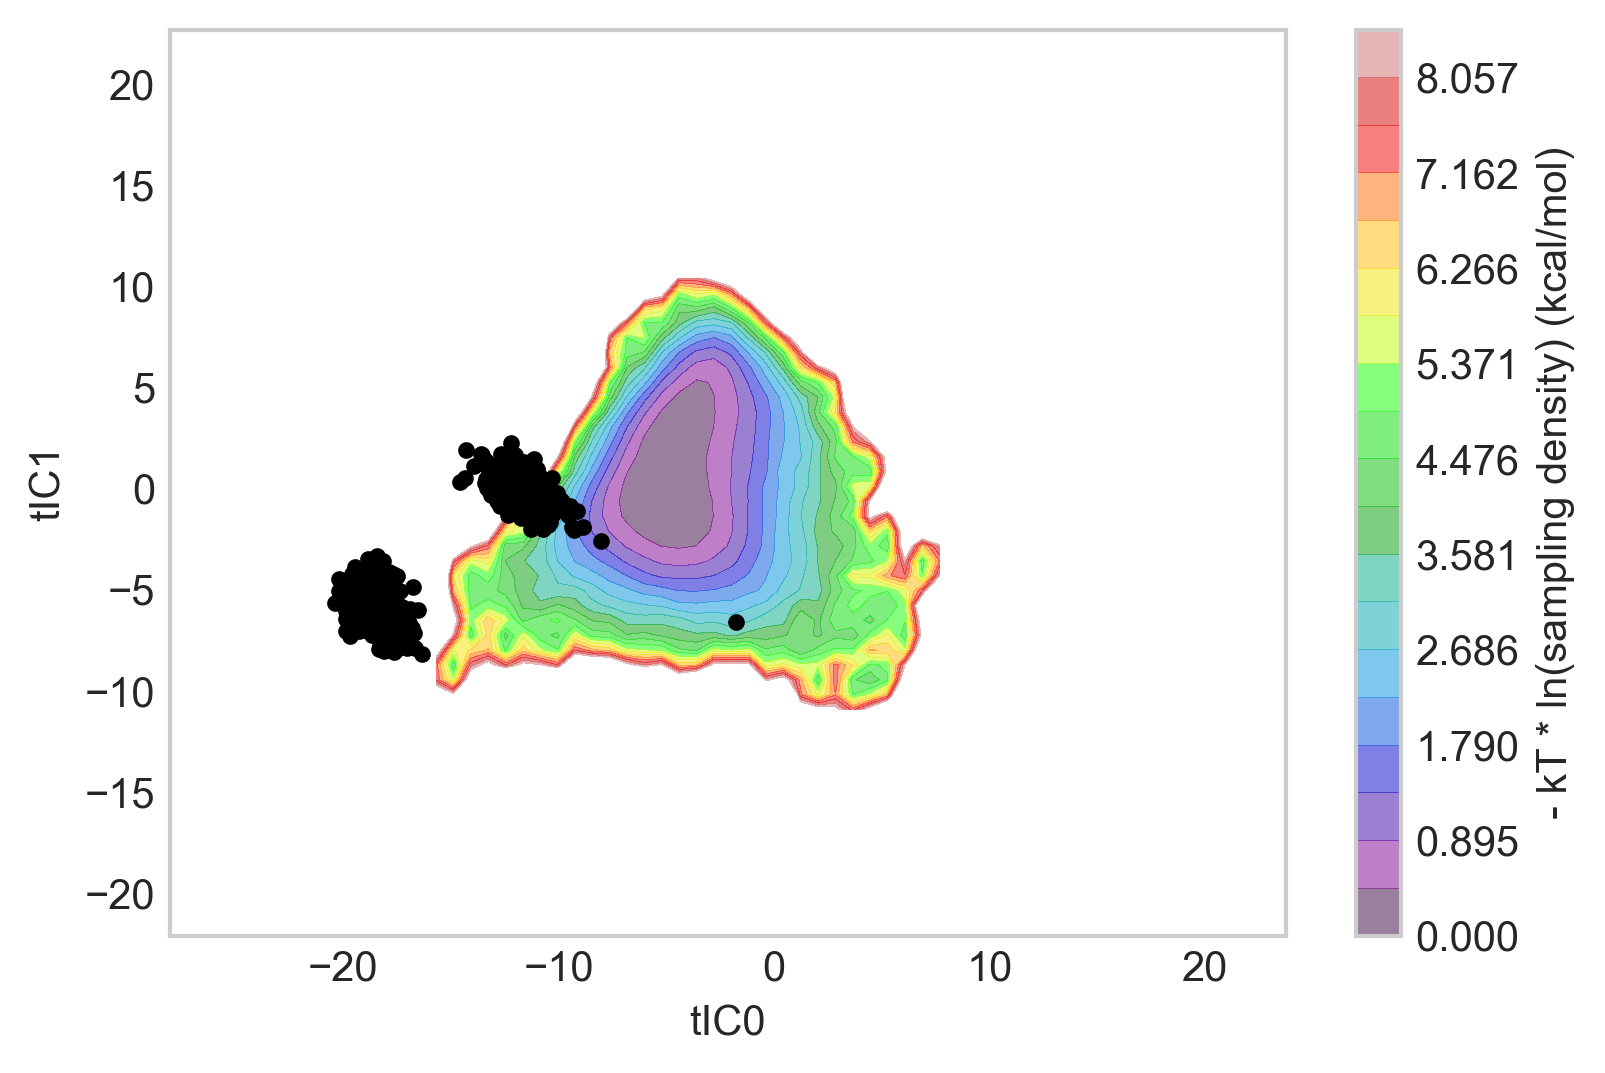

In [57]:
# first we plot all data in the TICS to get xlim and ylim

i,j = 0,1

plot_data = msmexplorer.plot_free_energy(tica_proj_concat_apo, obs=(i,j), cbar=True, return_data=True, n_samples=100000)
plt.close()

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC0')
ax.set_ylabel('tIC1')
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('- kT * ln(sampling density) (kcal/mol)')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

#plt.savefig('tica/tics_0_1_starting_strs.png', dpi=300)
plt.close()

# now actual data
plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True, n_samples=100000)
plt.close()

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
ax.grid(False)
ax.set_xlabel('tIC%d' % i)
ax.set_ylabel('tIC%d' % j)
vmin = -1E-12
vmax = np.percentile(plot_data[1][2], 50)
n_levels = 20
alpha = 0.5
im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('- kT * ln(sampling density) (kcal/mol)')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
    
plt.scatter([x[i] for x in apo_starts], [x[j] for x in apo_starts], c='black', marker='.')

#plt.savefig('landscapes/tics_%d_%d.png' % (i,j), dpi=300)
plt.show()

In [58]:
# data above was WRONG - had a different topologies problem in featurization, here goes corrected data: